# Medical Insurance Cost Dataset - Comprehensive Exploratory Data Analysis

## Overview
This notebook provides a comprehensive exploratory data analysis of the Medical Insurance Cost Dataset. The dataset contains information about medical insurance charges based on various demographic and health factors.

## Dataset Information
- **Source**: Medical Insurance Cost Dataset
- **Size**: 1,338 records
- **Features**: 7 columns (6 predictors + 1 target)
- **Target Variable**: charges (medical insurance costs)

## Columns:
- `age`: Age of the primary beneficiary
- `sex`: Insurance contractor gender (female/male)
- `bmi`: Body mass index
- `children`: Number of children/dependents covered by health insurance
- `smoker`: Smoking status (yes/no)
- `region`: Beneficiary's residential area (northeast, northwest, southeast, southwest)
- `charges`: Individual medical costs billed by health insurance

## 1. Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Configure display settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load the dataset
df = pd.read_csv('insurance.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nDataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset shape: (1338, 7)

Dataset loaded successfully with 1338 rows and 7 columns.


## 2. Initial Data Exploration

In [3]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# Basic information about the dataset
print("Dataset Info:")
df.info()
print("\n" + "="*50)
print("\nDataset Description:")
df.describe(include='all')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dataset Description:


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Total missing values: 0

Duplicate rows: 1


In [6]:
# Examine unique values in categorical columns
categorical_cols = ['sex', 'smoker', 'region']
print("Unique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

Unique values in categorical columns:

sex: ['female' 'male']
Value counts for sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker: ['yes' 'no']
Value counts for smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region: ['southwest' 'southeast' 'northwest' 'northeast']
Value counts for region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


## 3. Data Quality Assessment and Cleaning

In [7]:
# Check for outliers in numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Create a copy for cleaning
df_clean = df.copy()

# Display outlier statistics
print("Outlier Analysis:")
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"  Range: {df[col].min():.2f} - {df[col].max():.2f}")
    print(f"  IQR bounds: {lower_bound:.2f} - {upper_bound:.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

Outlier Analysis:

age:
  Range: 18.00 - 64.00
  IQR bounds: -9.00 - 87.00
  Outliers: 0 (0.0%)

bmi:
  Range: 15.96 - 53.13
  IQR bounds: 13.70 - 47.29
  Outliers: 9 (0.7%)

children:
  Range: 0.00 - 5.00
  IQR bounds: -3.00 - 5.00
  Outliers: 0 (0.0%)

charges:
  Range: 1121.87 - 63770.43
  IQR bounds: -13109.15 - 34489.35
  Outliers: 139 (10.4%)


In [8]:
# Check data ranges for validity
print("Data Range Validation:")
print(f"Age range: {df['age'].min()} - {df['age'].max()} years")
print(f"BMI range: {df['bmi'].min():.1f} - {df['bmi'].max():.1f}")
print(f"Children range: {df['children'].min()} - {df['children'].max()}")
print(f"Charges range: ${df['charges'].min():.2f} - ${df['charges'].max():.2f}")

# Check for any unusual BMI values
print(f"\nBMI Analysis:")
print(f"Underweight (BMI < 18.5): {len(df[df['bmi'] < 18.5])} ({len(df[df['bmi'] < 18.5])/len(df)*100:.1f}%)")
print(f"Normal (18.5 ≤ BMI < 25): {len(df[(df['bmi'] >= 18.5) & (df['bmi'] < 25)])} ({len(df[(df['bmi'] >= 18.5) & (df['bmi'] < 25)])/len(df)*100:.1f}%)")
print(f"Overweight (25 ≤ BMI < 30): {len(df[(df['bmi'] >= 25) & (df['bmi'] < 30)])} ({len(df[(df['bmi'] >= 25) & (df['bmi'] < 30)])/len(df)*100:.1f}%)")
print(f"Obese (BMI ≥ 30): {len(df[df['bmi'] >= 30])} ({len(df[df['bmi'] >= 30])/len(df)*100:.1f}%)")

Data Range Validation:
Age range: 18 - 64 years
BMI range: 16.0 - 53.1
Children range: 0 - 5
Charges range: $1121.87 - $63770.43

BMI Analysis:
Underweight (BMI < 18.5): 20 (1.5%)
Normal (18.5 ≤ BMI < 25): 225 (16.8%)
Overweight (25 ≤ BMI < 30): 386 (28.8%)
Obese (BMI ≥ 30): 707 (52.8%)


## 4. Univariate Analysis

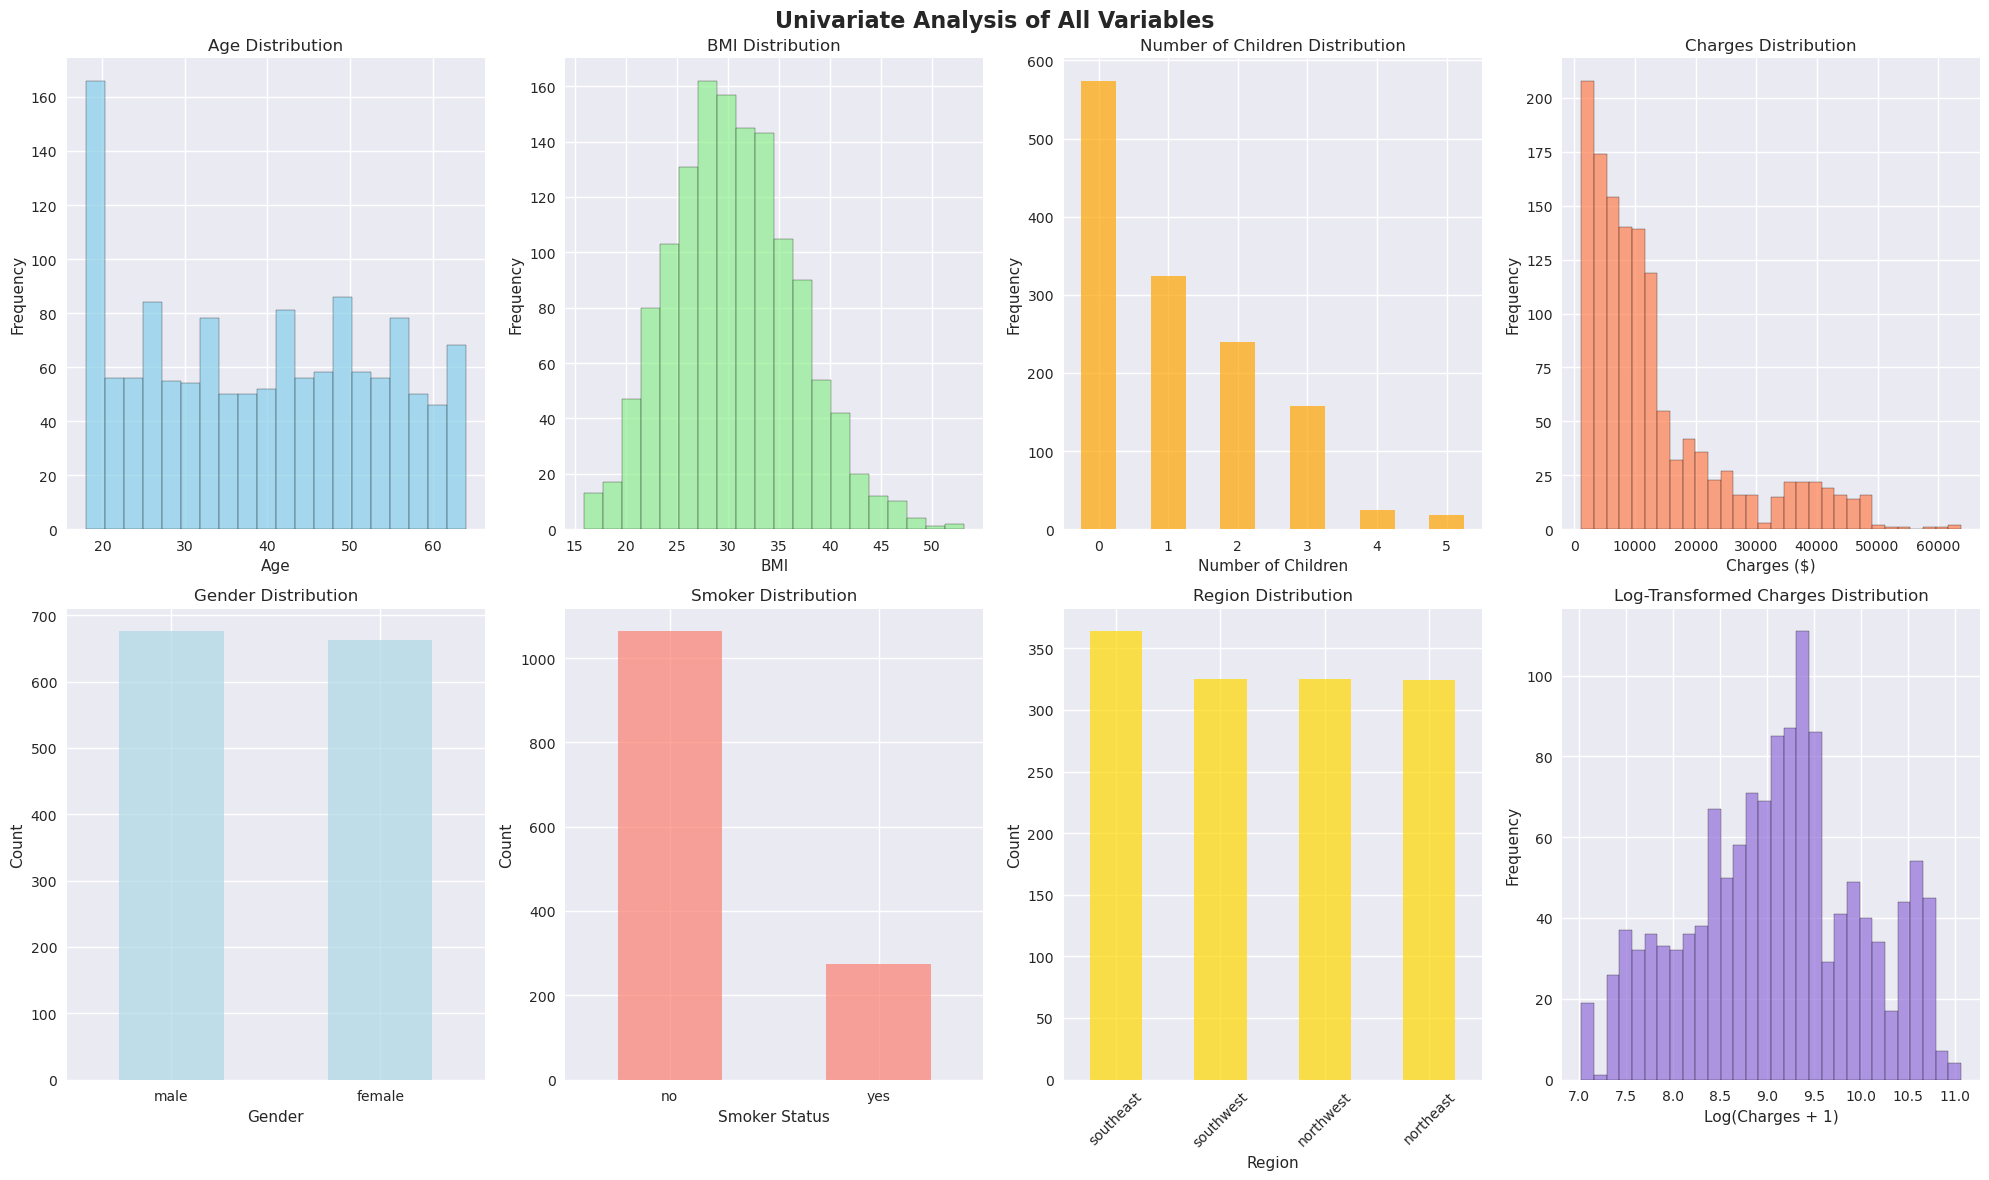

In [9]:
# Create comprehensive univariate plots
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
fig.suptitle('Univariate Analysis of All Variables', fontsize=16, fontweight='bold')

# Age distribution
axes[0,0].hist(df['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# BMI distribution
axes[0,1].hist(df['bmi'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('BMI Distribution')
axes[0,1].set_xlabel('BMI')
axes[0,1].set_ylabel('Frequency')

# Children distribution
df['children'].value_counts().sort_index().plot(kind='bar', ax=axes[0,2], color='orange', alpha=0.7)
axes[0,2].set_title('Number of Children Distribution')
axes[0,2].set_xlabel('Number of Children')
axes[0,2].set_ylabel('Frequency')
axes[0,2].tick_params(axis='x', rotation=0)

# Charges distribution
axes[0,3].hist(df['charges'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[0,3].set_title('Charges Distribution')
axes[0,3].set_xlabel('Charges ($)')
axes[0,3].set_ylabel('Frequency')

# Sex distribution
df['sex'].value_counts().plot(kind='bar', ax=axes[1,0], color='lightblue', alpha=0.7)
axes[1,0].set_title('Gender Distribution')
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=0)

# Smoker distribution
df['smoker'].value_counts().plot(kind='bar', ax=axes[1,1], color='salmon', alpha=0.7)
axes[1,1].set_title('Smoker Distribution')
axes[1,1].set_xlabel('Smoker Status')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=0)

# Region distribution
df['region'].value_counts().plot(kind='bar', ax=axes[1,2], color='gold', alpha=0.7)
axes[1,2].set_title('Region Distribution')
axes[1,2].set_xlabel('Region')
axes[1,2].set_ylabel('Count')
axes[1,2].tick_params(axis='x', rotation=45)

# Log-transformed charges (to handle skewness)
axes[1,3].hist(np.log1p(df['charges']), bins=30, alpha=0.7, color='mediumpurple', edgecolor='black')
axes[1,3].set_title('Log-Transformed Charges Distribution')
axes[1,3].set_xlabel('Log(Charges + 1)')
axes[1,3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [10]:
# Statistical summary for numerical variables
print("Detailed Statistical Summary:")
print("="*60)

for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Mode: {df[col].mode().iloc[0]:.2f}")
    print(f"  Standard Deviation: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")
    print(f"  Range: {df[col].max() - df[col].min():.2f}")

Detailed Statistical Summary:

AGE:
  Mean: 39.21
  Median: 39.00
  Mode: 18.00
  Standard Deviation: 14.05
  Skewness: 0.06
  Kurtosis: -1.25
  Range: 46.00

BMI:
  Mean: 30.66
  Median: 30.40
  Mode: 32.30
  Standard Deviation: 6.10
  Skewness: 0.28
  Kurtosis: -0.05
  Range: 37.17

CHILDREN:
  Mean: 1.09
  Median: 1.00
  Mode: 0.00
  Standard Deviation: 1.21
  Skewness: 0.94
  Kurtosis: 0.20
  Range: 5.00

CHARGES:
  Mean: 13270.42
  Median: 9382.03
  Mode: 1639.56
  Standard Deviation: 12110.01
  Skewness: 1.52
  Kurtosis: 1.61
  Range: 62648.55


## 5. Bivariate Analysis

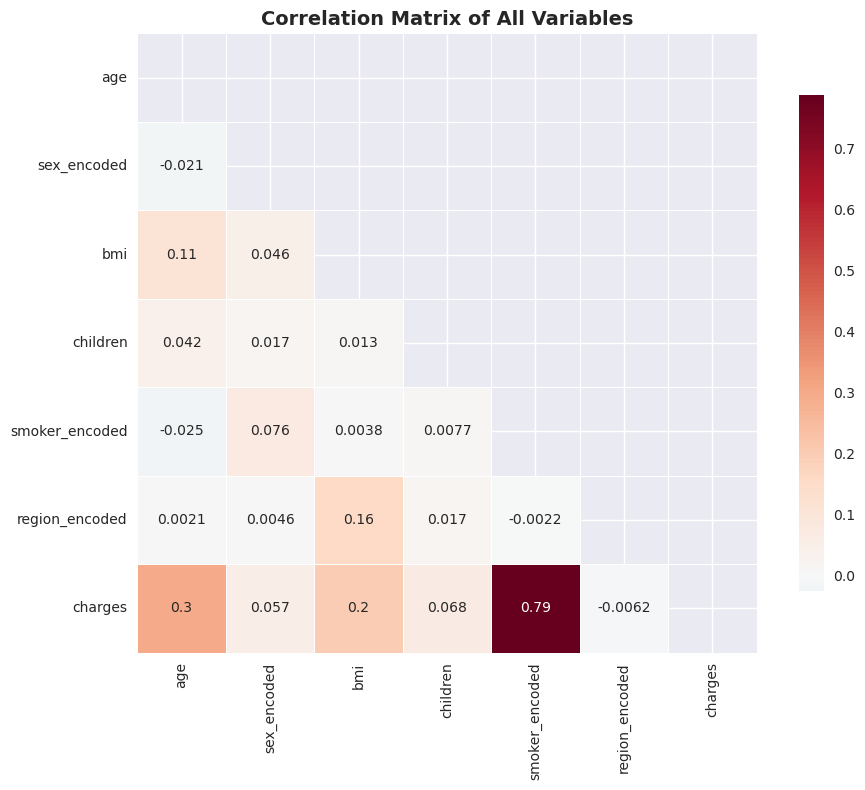


Correlations with Charges (absolute values):
smoker_encoded: 0.787
age: 0.299
bmi: 0.198
children: 0.068
sex_encoded: 0.057
region_encoded: 0.006


In [11]:
# Correlation matrix
# First, encode categorical variables for correlation analysis
df_encoded = df.copy()
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_encoded['sex_encoded'] = le_sex.fit_transform(df['sex'])
df_encoded['smoker_encoded'] = le_smoker.fit_transform(df['smoker'])
df_encoded['region_encoded'] = le_region.fit_transform(df['region'])

# Calculate correlation matrix
correlation_cols = ['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded', 'charges']
corr_matrix = df_encoded[correlation_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of All Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strongest correlations with charges
charges_corr = corr_matrix['charges'].abs().sort_values(ascending=False)
print("\nCorrelations with Charges (absolute values):")
for var, corr in charges_corr.items():
    if var != 'charges':
        print(f"{var}: {corr:.3f}")

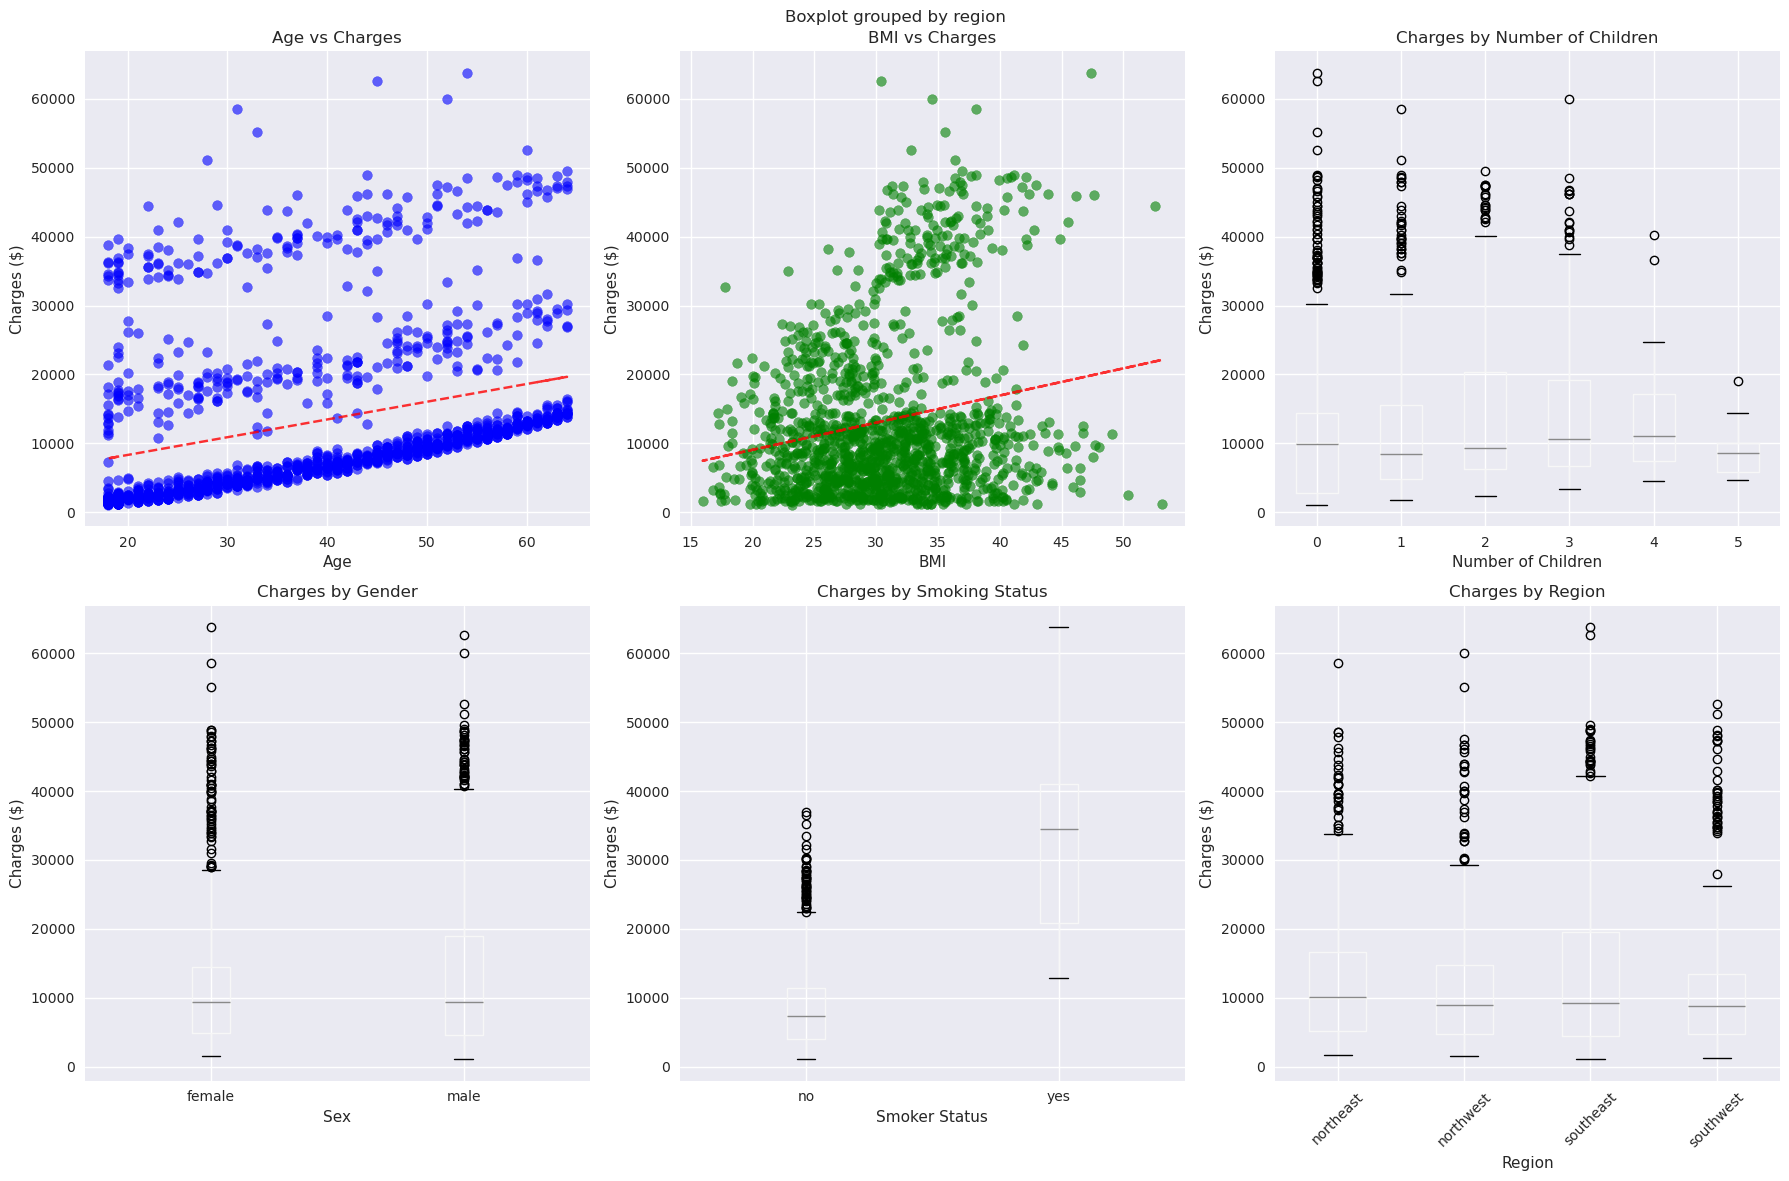

In [12]:
# Detailed bivariate analysis with charges
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bivariate Analysis: Relationship with Insurance Charges', fontsize=16, fontweight='bold')

# Age vs Charges
axes[0,0].scatter(df['age'], df['charges'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Charges ($)')
axes[0,0].set_title('Age vs Charges')
# Add trend line
z = np.polyfit(df['age'], df['charges'], 1)
p = np.poly1d(z)
axes[0,0].plot(df['age'], p(df['age']), "r--", alpha=0.8)

# BMI vs Charges
axes[0,1].scatter(df['bmi'], df['charges'], alpha=0.6, color='green')
axes[0,1].set_xlabel('BMI')
axes[0,1].set_ylabel('Charges ($)')
axes[0,1].set_title('BMI vs Charges')
# Add trend line
z = np.polyfit(df['bmi'], df['charges'], 1)
p = np.poly1d(z)
axes[0,1].plot(df['bmi'], p(df['bmi']), "r--", alpha=0.8)

# Children vs Charges
df.boxplot(column='charges', by='children', ax=axes[0,2])
axes[0,2].set_xlabel('Number of Children')
axes[0,2].set_ylabel('Charges ($)')
axes[0,2].set_title('Charges by Number of Children')

# Sex vs Charges
df.boxplot(column='charges', by='sex', ax=axes[1,0])
axes[1,0].set_xlabel('Sex')
axes[1,0].set_ylabel('Charges ($)')
axes[1,0].set_title('Charges by Gender')

# Smoker vs Charges
df.boxplot(column='charges', by='smoker', ax=axes[1,1])
axes[1,1].set_xlabel('Smoker Status')
axes[1,1].set_ylabel('Charges ($)')
axes[1,1].set_title('Charges by Smoking Status')

# Region vs Charges
df.boxplot(column='charges', by='region', ax=axes[1,2])
axes[1,2].set_xlabel('Region')
axes[1,2].set_ylabel('Charges ($)')
axes[1,2].set_title('Charges by Region')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [13]:
# Statistical tests for group differences
from scipy.stats import ttest_ind, f_oneway

print("Statistical Tests for Group Differences in Charges:")
print("="*60)

# T-test for gender differences
male_charges = df[df['sex'] == 'male']['charges']
female_charges = df[df['sex'] == 'female']['charges']
t_stat, p_val = ttest_ind(male_charges, female_charges)
print(f"\nGender T-test:")
print(f"  Male mean: ${male_charges.mean():.2f}")
print(f"  Female mean: ${female_charges.mean():.2f}")
print(f"  T-statistic: {t_stat:.3f}")
print(f"  P-value: {p_val:.6f}")
print(f"  Significant difference: {'Yes' if p_val < 0.05 else 'No'}")

# T-test for smoking status
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']
t_stat, p_val = ttest_ind(smoker_charges, nonsmoker_charges)
print(f"\nSmoking Status T-test:")
print(f"  Smoker mean: ${smoker_charges.mean():.2f}")
print(f"  Non-smoker mean: ${nonsmoker_charges.mean():.2f}")
print(f"  T-statistic: {t_stat:.3f}")
print(f"  P-value: {p_val:.6f}")
print(f"  Significant difference: {'Yes' if p_val < 0.05 else 'No'}")

# ANOVA for region differences
northeast = df[df['region'] == 'northeast']['charges']
northwest = df[df['region'] == 'northwest']['charges']
southeast = df[df['region'] == 'southeast']['charges']
southwest = df[df['region'] == 'southwest']['charges']

f_stat, p_val = f_oneway(northeast, northwest, southeast, southwest)
print(f"\nRegion ANOVA:")
print(f"  Northeast mean: ${northeast.mean():.2f}")
print(f"  Northwest mean: ${northwest.mean():.2f}")
print(f"  Southeast mean: ${southeast.mean():.2f}")
print(f"  Southwest mean: ${southwest.mean():.2f}")
print(f"  F-statistic: {f_stat:.3f}")
print(f"  P-value: {p_val:.6f}")
print(f"  Significant difference: {'Yes' if p_val < 0.05 else 'No'}")

Statistical Tests for Group Differences in Charges:

Gender T-test:
  Male mean: $13956.75
  Female mean: $12569.58
  T-statistic: 2.098
  P-value: 0.036133
  Significant difference: Yes

Smoking Status T-test:
  Smoker mean: $32050.23
  Non-smoker mean: $8434.27
  T-statistic: 46.665
  P-value: 0.000000
  Significant difference: Yes

Region ANOVA:
  Northeast mean: $13406.38
  Northwest mean: $12417.58
  Southeast mean: $14735.41
  Southwest mean: $12346.94
  F-statistic: 2.970
  P-value: 0.030893
  Significant difference: Yes


## 6. Advanced Analysis: Interaction Effects

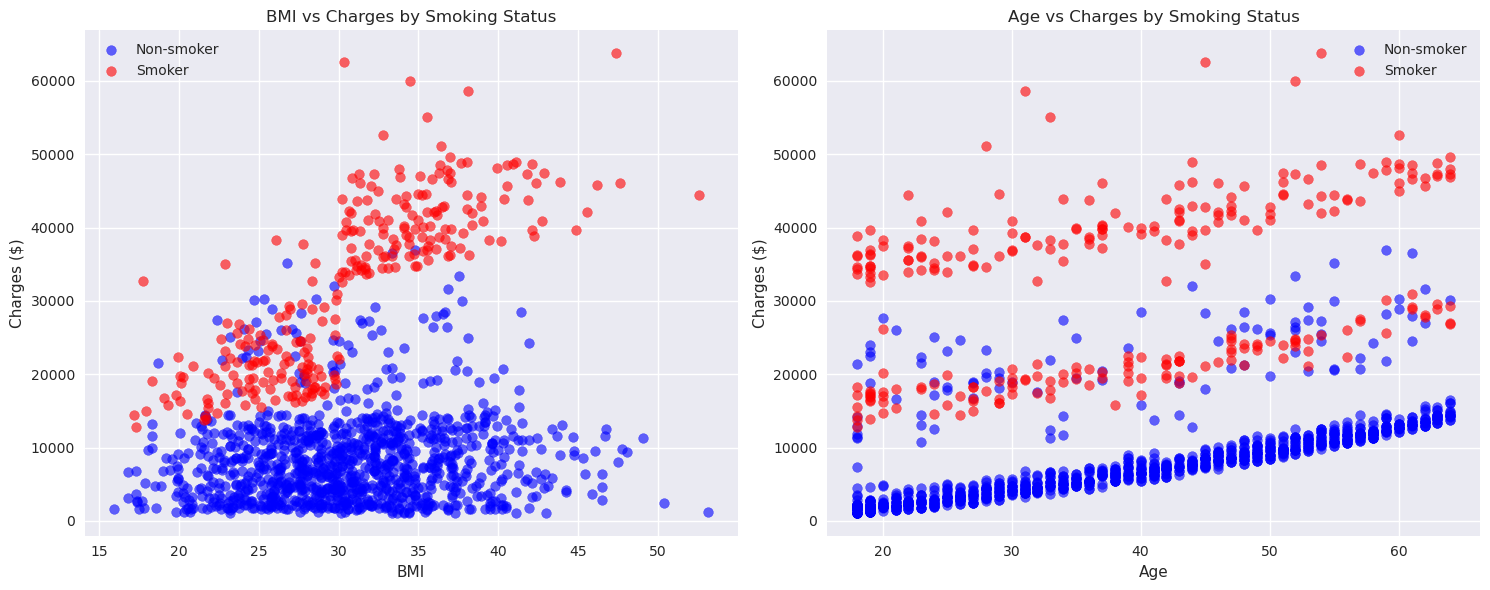

In [14]:
# Advanced visualization: Smoking and BMI interaction
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot with smoking status
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

axes[0].scatter(non_smokers['bmi'], non_smokers['charges'], alpha=0.6, label='Non-smoker', color='blue')
axes[0].scatter(smokers['bmi'], smokers['charges'], alpha=0.6, label='Smoker', color='red')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Charges ($)')
axes[0].set_title('BMI vs Charges by Smoking Status')
axes[0].legend()

# Age and smoking interaction
axes[1].scatter(non_smokers['age'], non_smokers['charges'], alpha=0.6, label='Non-smoker', color='blue')
axes[1].scatter(smokers['age'], smokers['charges'], alpha=0.6, label='Smoker', color='red')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Charges ($)')
axes[1].set_title('Age vs Charges by Smoking Status')
axes[1].legend()

plt.tight_layout()
plt.show()

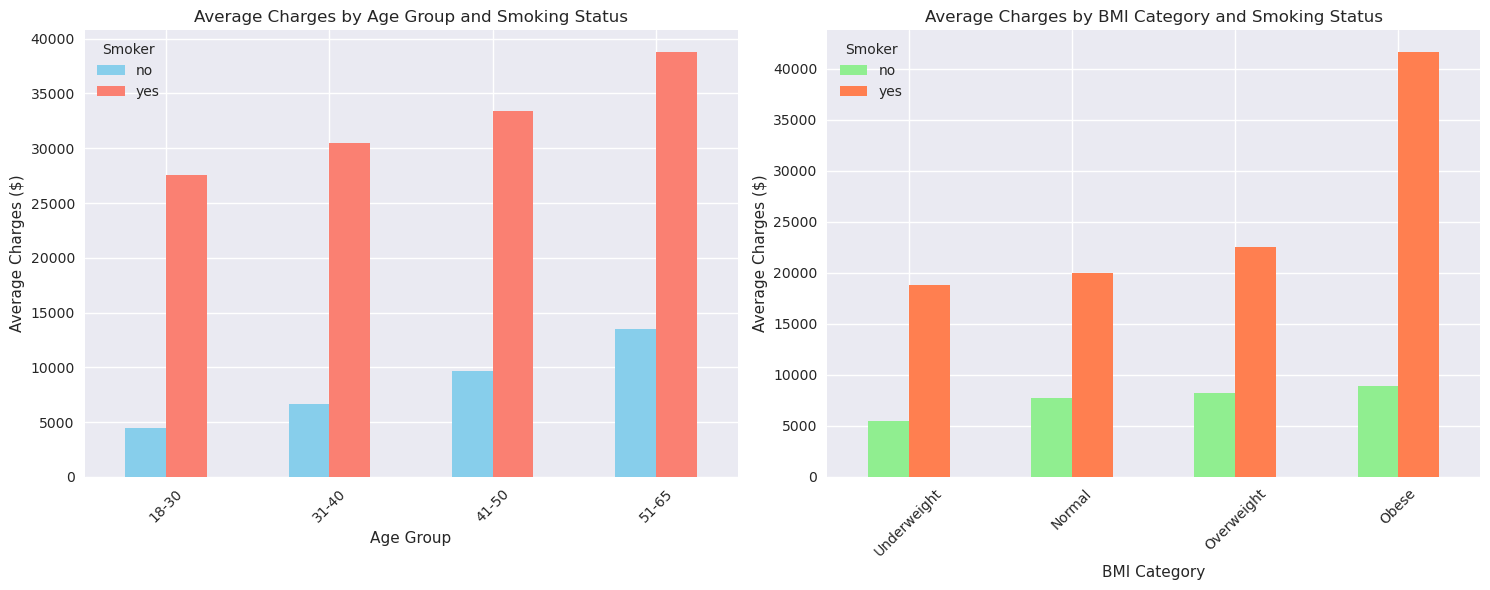

Average Charges by Age Group and Smoking Status:
smoker           no       yes
age_group                    
18-30       4462.31  27528.08
31-40       6631.05  30466.66
41-50       9622.06  33391.83
51-65      13540.28  38820.22

Average Charges by BMI Category and Smoking Status:
smoker             no       yes
bmi_category                   
Underweight   5485.06  18809.82
Normal        7734.65  19942.22
Overweight    8226.09  22491.18
Obese         8878.51  41673.17


In [15]:
# Create age groups for analysis
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 40, 50, 65], labels=['18-30', '31-40', '41-50', '51-65'])

# Create BMI categories
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 50], 
                           labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Multi-dimensional analysis
pivot_smoking_age = df.groupby(['age_group', 'smoker'])['charges'].mean().unstack()
pivot_smoking_bmi = df.groupby(['bmi_category', 'smoker'])['charges'].mean().unstack()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Age group and smoking interaction
pivot_smoking_age.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Average Charges by Age Group and Smoking Status')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Average Charges ($)')
axes[0].legend(title='Smoker')
axes[0].tick_params(axis='x', rotation=45)

# BMI category and smoking interaction
pivot_smoking_bmi.plot(kind='bar', ax=axes[1], color=['lightgreen', 'coral'])
axes[1].set_title('Average Charges by BMI Category and Smoking Status')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Average Charges ($)')
axes[1].legend(title='Smoker')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Average Charges by Age Group and Smoking Status:")
print(pivot_smoking_age.round(2))
print("\nAverage Charges by BMI Category and Smoking Status:")
print(pivot_smoking_bmi.round(2))

## 7. Regional Analysis

Regional Analysis Summary:
           Avg_Charges  Median_Charges  Std_Charges  Count  Avg_Age  Avg_BMI  \
region                                                                         
northeast     13406.38        10057.65     11255.80    324    39.27    29.17   
northwest     12417.58         8965.80     11072.28    325    39.20    29.20   
southeast     14735.41         9294.13     13971.10    364    38.94    33.36   
southwest     12346.94         8798.59     11557.18    325    39.46    30.60   

           Avg_Children  
region                   
northeast          1.05  
northwest          1.15  
southeast          1.05  
southwest          1.14  


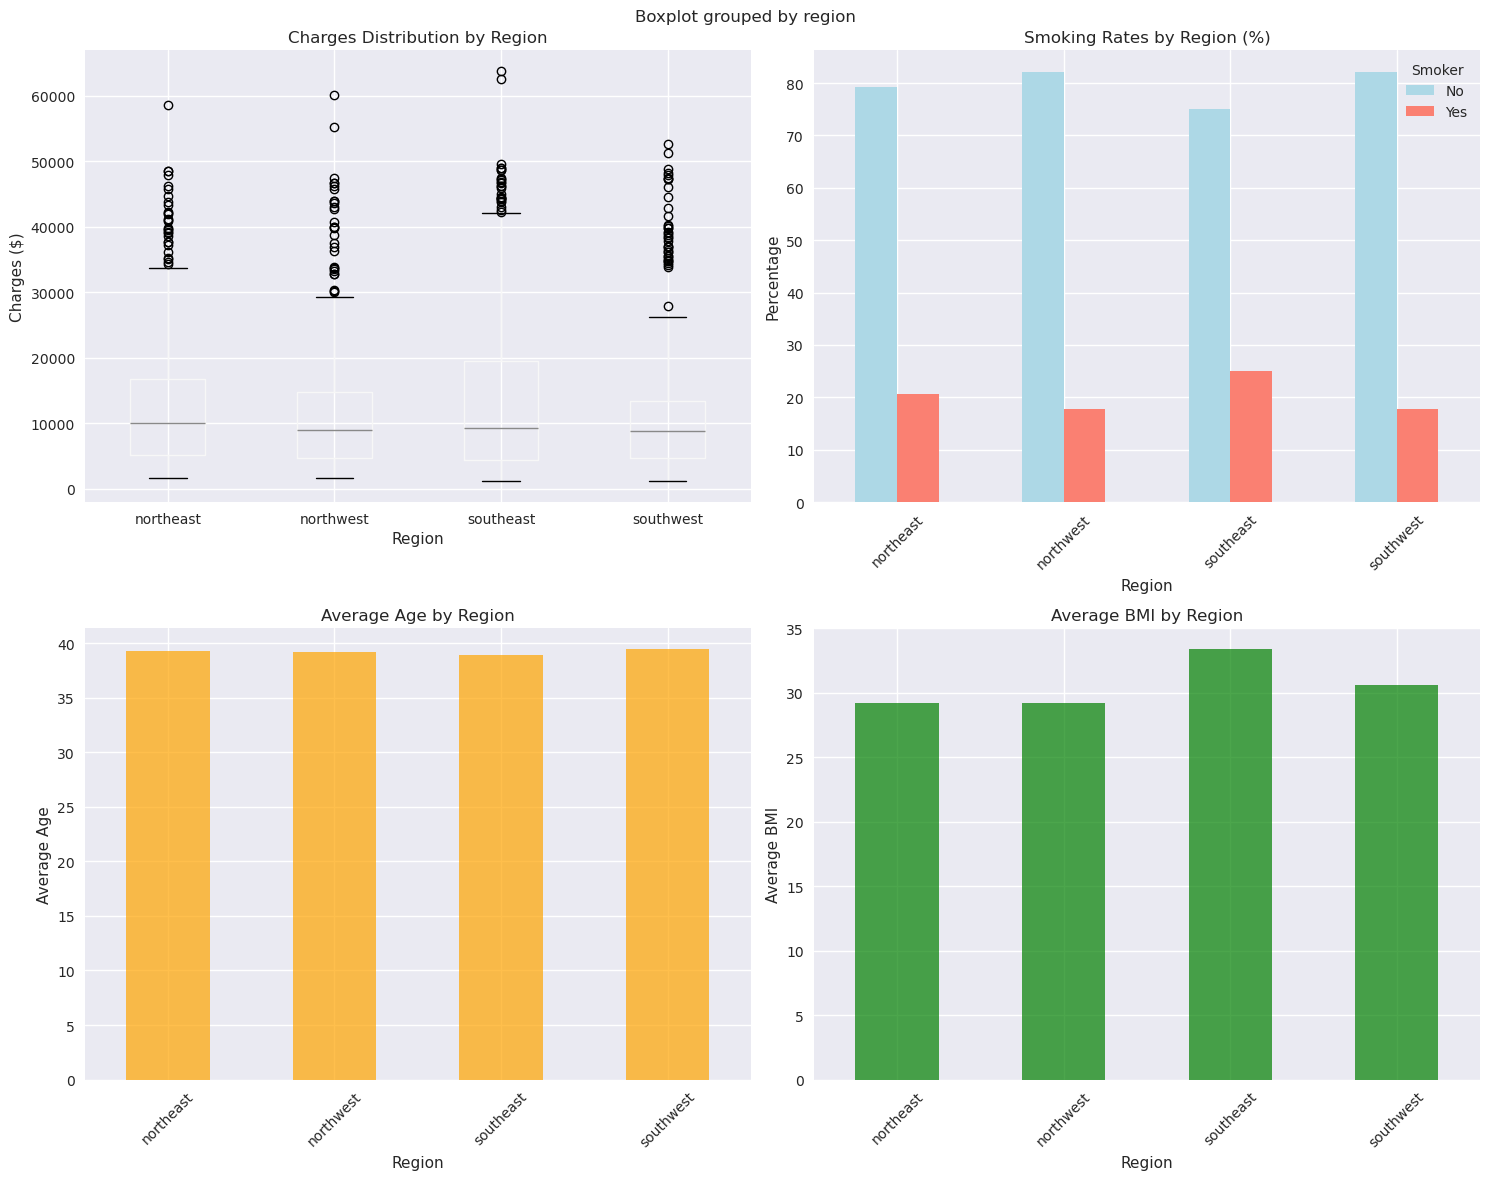

In [16]:
# Comprehensive regional analysis
region_analysis = df.groupby('region').agg({
    'charges': ['mean', 'median', 'std', 'count'],
    'age': 'mean',
    'bmi': 'mean',
    'children': 'mean'
}).round(2)

region_analysis.columns = ['Avg_Charges', 'Median_Charges', 'Std_Charges', 'Count', 'Avg_Age', 'Avg_BMI', 'Avg_Children']
print("Regional Analysis Summary:")
print(region_analysis)

# Regional smoking rates
smoking_by_region = df.groupby(['region', 'smoker']).size().unstack(fill_value=0)
smoking_rates = smoking_by_region.div(smoking_by_region.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Regional charges comparison
df.boxplot(column='charges', by='region', ax=axes[0,0])
axes[0,0].set_title('Charges Distribution by Region')
axes[0,0].set_xlabel('Region')
axes[0,0].set_ylabel('Charges ($)')

# Regional smoking rates
smoking_rates.plot(kind='bar', ax=axes[0,1], color=['lightblue', 'salmon'])
axes[0,1].set_title('Smoking Rates by Region (%)')
axes[0,1].set_xlabel('Region')
axes[0,1].set_ylabel('Percentage')
axes[0,1].legend(title='Smoker', labels=['No', 'Yes'])
axes[0,1].tick_params(axis='x', rotation=45)

# Regional age distribution
region_age = df.groupby('region')['age'].mean()
region_age.plot(kind='bar', ax=axes[1,0], color='orange', alpha=0.7)
axes[1,0].set_title('Average Age by Region')
axes[1,0].set_xlabel('Region')
axes[1,0].set_ylabel('Average Age')
axes[1,0].tick_params(axis='x', rotation=45)

# Regional BMI distribution
region_bmi = df.groupby('region')['bmi'].mean()
region_bmi.plot(kind='bar', ax=axes[1,1], color='green', alpha=0.7)
axes[1,1].set_title('Average BMI by Region')
axes[1,1].set_xlabel('Region')
axes[1,1].set_ylabel('Average BMI')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Predictive Modeling

In [17]:
# Prepare data for modeling
# Create dummy variables for categorical features
df_model = pd.get_dummies(df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], 
                         columns=['sex', 'smoker', 'region'], drop_first=True)

# Separate features and target
X = df_model.drop('charges', axis=1)
y = df_model['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Features: {list(X.columns)}")

Training set size: 1070
Test set size: 268
Features: ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [18]:
# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

model_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    model_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'predictions': y_pred
    }
    
    print(f"\n{name} Results:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")

# Feature importance for Random Forest
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)


Linear Regression Results:
  MSE: 33596915.85
  RMSE: 5796.28
  R²: 0.7836

Random Forest Results:
  MSE: 20942520.92
  RMSE: 4576.30
  R²: 0.8651

Feature Importance (Random Forest):
            feature  importance
4        smoker_yes    0.608618
1               bmi    0.216506
0               age    0.134232
2          children    0.019413
3          sex_male    0.006379
5  region_northwest    0.005587
6  region_southeast    0.005314
7  region_southwest    0.003950


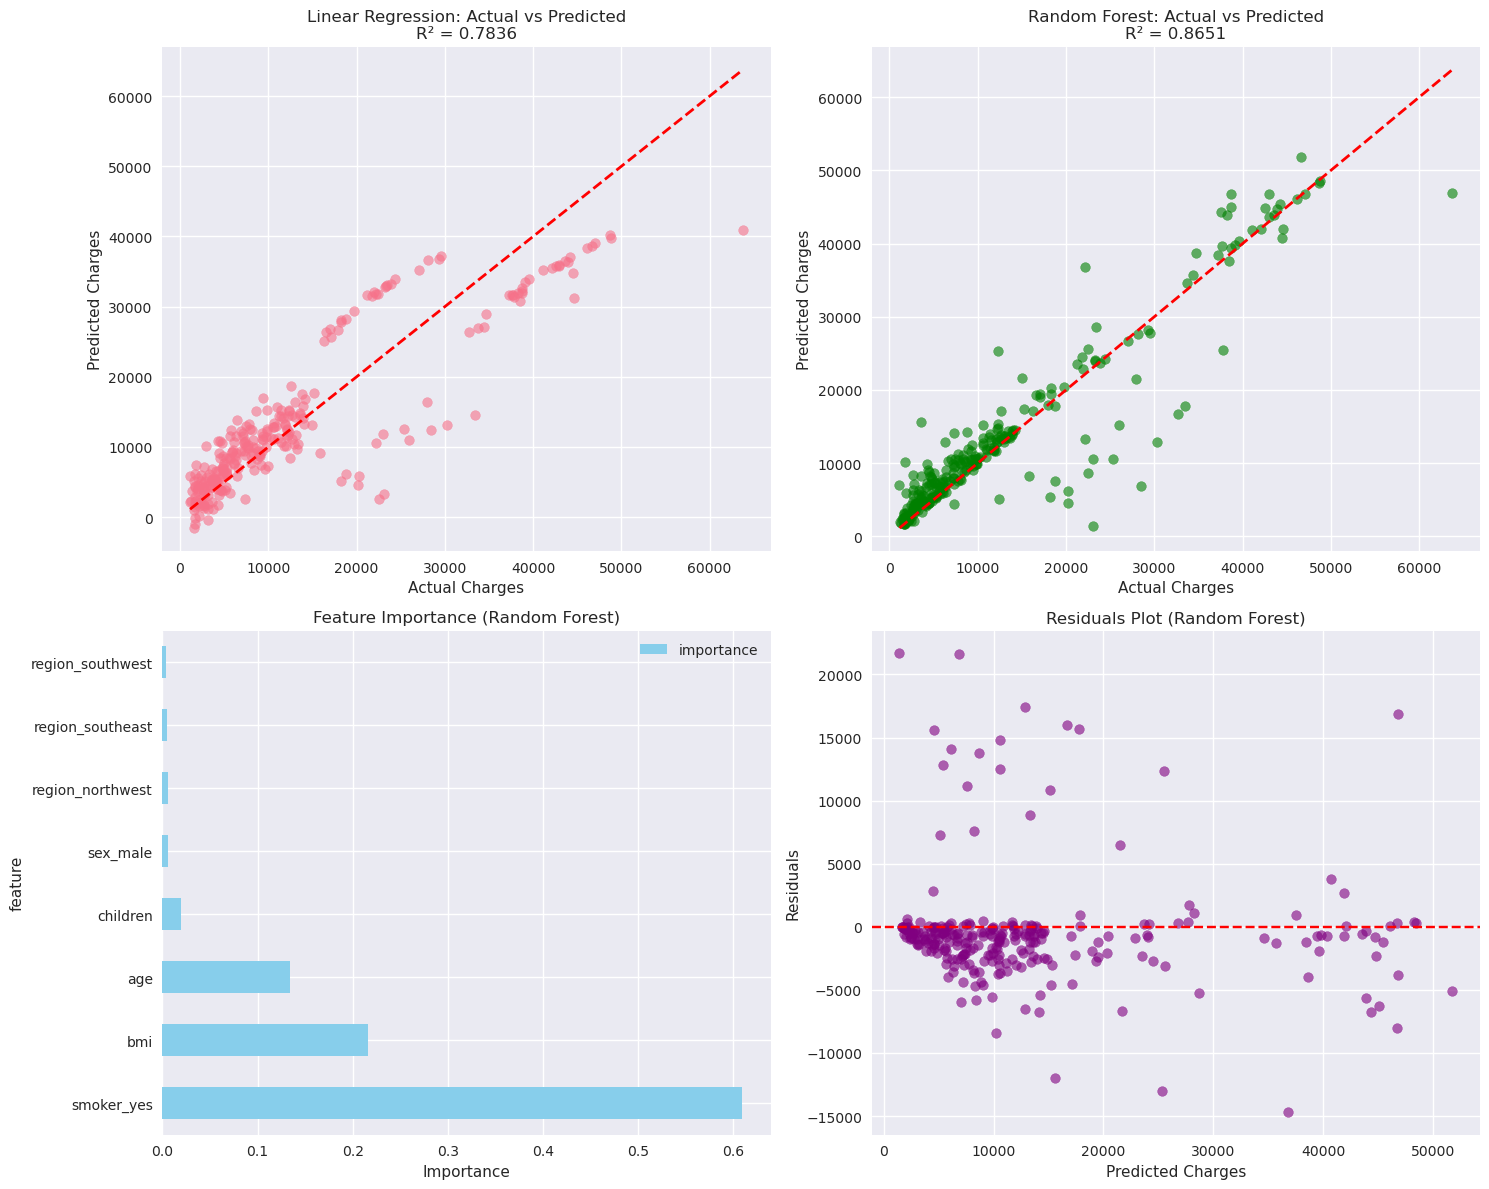

In [19]:
# Visualize model performance and feature importance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Actual vs Predicted for Linear Regression
lr_pred = model_results['Linear Regression']['predictions']
axes[0,0].scatter(y_test, lr_pred, alpha=0.6)
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Charges')
axes[0,0].set_ylabel('Predicted Charges')
axes[0,0].set_title(f'Linear Regression: Actual vs Predicted\nR² = {model_results["Linear Regression"]["R²"]:.4f}')

# Actual vs Predicted for Random Forest
rf_pred = model_results['Random Forest']['predictions']
axes[0,1].scatter(y_test, rf_pred, alpha=0.6, color='green')
axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,1].set_xlabel('Actual Charges')
axes[0,1].set_ylabel('Predicted Charges')
axes[0,1].set_title(f'Random Forest: Actual vs Predicted\nR² = {model_results["Random Forest"]["R²"]:.4f}')

# Feature importance
feature_importance.plot(x='feature', y='importance', kind='barh', ax=axes[1,0], color='skyblue')
axes[1,0].set_title('Feature Importance (Random Forest)')
axes[1,0].set_xlabel('Importance')

# Residuals plot
residuals = y_test - rf_pred
axes[1,1].scatter(rf_pred, residuals, alpha=0.6, color='purple')
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Predicted Charges')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title('Residuals Plot (Random Forest)')

plt.tight_layout()
plt.show()

## 9. Key Insights and Conclusions

In [20]:
# Summary statistics and key findings
print("KEY FINDINGS FROM MEDICAL INSURANCE COST ANALYSIS")
print("=" * 60)

print("\n1. DATASET OVERVIEW:")
print(f"   • Total records: {len(df):,}")
print(f"   • Age range: {df['age'].min()}-{df['age'].max()} years")
print(f"   • Charge range: ${df['charges'].min():,.2f} - ${df['charges'].max():,.2f}")
print(f"   • Average charge: ${df['charges'].mean():,.2f}")
print(f"   • Median charge: ${df['charges'].median():,.2f}")

print("\n2. SMOKING IMPACT:")
smoker_avg = df[df['smoker'] == 'yes']['charges'].mean()
nonsmoker_avg = df[df['smoker'] == 'no']['charges'].mean()
smoking_multiplier = smoker_avg / nonsmoker_avg
print(f"   • Smokers: ${smoker_avg:,.2f} average charge")
print(f"   • Non-smokers: ${nonsmoker_avg:,.2f} average charge")
print(f"   • Smokers pay {smoking_multiplier:.1f}x more than non-smokers")

print("\n3. AGE FACTOR:")
age_corr = df['age'].corr(df['charges'])
print(f"   • Correlation with charges: {age_corr:.3f}")
print(f"   • Charges generally increase with age")

print("\n4. BMI INSIGHTS:")
bmi_corr = df['bmi'].corr(df['charges'])
obese_avg = df[df['bmi'] >= 30]['charges'].mean()
normal_avg = df[(df['bmi'] >= 18.5) & (df['bmi'] < 25)]['charges'].mean()
print(f"   • Correlation with charges: {bmi_corr:.3f}")
print(f"   • Obese individuals: ${obese_avg:,.2f} average charge")
print(f"   • Normal weight individuals: ${normal_avg:,.2f} average charge")

print("\n5. REGIONAL DIFFERENCES:")
regional_charges = df.groupby('region')['charges'].mean().sort_values(ascending=False)
for region, avg_charge in regional_charges.items():
    print(f"   • {region.title()}: ${avg_charge:,.2f}")

print("\n6. GENDER ANALYSIS:")
male_avg = df[df['sex'] == 'male']['charges'].mean()
female_avg = df[df['sex'] == 'female']['charges'].mean()
print(f"   • Male average: ${male_avg:,.2f}")
print(f"   • Female average: ${female_avg:,.2f}")
print(f"   • Difference: ${abs(male_avg - female_avg):,.2f} ({abs(male_avg - female_avg)/min(male_avg, female_avg)*100:.1f}%)")

print("\n7. PREDICTIVE MODEL PERFORMANCE:")
best_model = max(model_results.keys(), key=lambda x: model_results[x]['R²'])
best_r2 = model_results[best_model]['R²']
print(f"   • Best model: {best_model}")
print(f"   • R² score: {best_r2:.4f} ({best_r2*100:.1f}% variance explained)")
print(f"   • RMSE: ${model_results[best_model]['RMSE']:,.2f}")

print("\n8. TOP PREDICTIVE FACTORS:")
top_features = feature_importance.head(3)
for _, row in top_features.iterrows():
    print(f"   • {row['feature']}: {row['importance']:.3f} importance")

KEY FINDINGS FROM MEDICAL INSURANCE COST ANALYSIS

1. DATASET OVERVIEW:
   • Total records: 1,338
   • Age range: 18-64 years
   • Charge range: $1,121.87 - $63,770.43
   • Average charge: $13,270.42
   • Median charge: $9,382.03

2. SMOKING IMPACT:
   • Smokers: $32,050.23 average charge
   • Non-smokers: $8,434.27 average charge
   • Smokers pay 3.8x more than non-smokers

3. AGE FACTOR:
   • Correlation with charges: 0.299
   • Charges generally increase with age

4. BMI INSIGHTS:
   • Correlation with charges: 0.198
   • Obese individuals: $15,552.34 average charge
   • Normal weight individuals: $10,409.34 average charge

5. REGIONAL DIFFERENCES:
   • Southeast: $14,735.41
   • Northeast: $13,406.38
   • Northwest: $12,417.58
   • Southwest: $12,346.94

6. GENDER ANALYSIS:
   • Male average: $13,956.75
   • Female average: $12,569.58
   • Difference: $1,387.17 (11.0%)

7. PREDICTIVE MODEL PERFORMANCE:
   • Best model: Random Forest
   • R² score: 0.8651 (86.5% variance explained)


## 10. Business Recommendations

In [21]:
print("BUSINESS RECOMMENDATIONS")
print("=" * 40)

print("\n1. RISK ASSESSMENT PRIORITIES:")
print("   • Smoking status is the strongest predictor of insurance costs")
print("   • Implement comprehensive smoking cessation programs")
print("   • Consider higher premiums for smokers with clear justification")

print("\n2. AGE-BASED STRATEGIES:")
print("   • Develop age-appropriate wellness programs")
print("   • Focus on preventive care for older populations")
print("   • Consider graduated premium structures by age groups")

print("\n3. HEALTH AND WELLNESS INITIATIVES:")
print("   • BMI management programs could reduce costs")
print("   • Incentivize healthy lifestyle choices")
print("   • Partner with fitness centers and nutritionists")

print("\n4. REGIONAL CONSIDERATIONS:")
print("   • Investigate factors causing regional cost differences")
print("   • Consider regional partnerships with healthcare providers")
print("   • Tailor programs to regional health trends")

print("\n5. DATA-DRIVEN PRICING:")
print("   • Use predictive models for more accurate risk assessment")
print("   • Implement dynamic pricing based on multiple factors")
print("   • Regular model updates with new data")

print("\n6. FAMILY PLANNING CONSIDERATIONS:")
print("   • Number of children shows minimal impact on costs")
print("   • Consider family-friendly policies to attract customers")
print("   • Focus premium adjustments on higher-impact factors")

BUSINESS RECOMMENDATIONS

1. RISK ASSESSMENT PRIORITIES:
   • Smoking status is the strongest predictor of insurance costs
   • Implement comprehensive smoking cessation programs
   • Consider higher premiums for smokers with clear justification

2. AGE-BASED STRATEGIES:
   • Develop age-appropriate wellness programs
   • Focus on preventive care for older populations
   • Consider graduated premium structures by age groups

3. HEALTH AND WELLNESS INITIATIVES:
   • BMI management programs could reduce costs
   • Incentivize healthy lifestyle choices
   • Partner with fitness centers and nutritionists

4. REGIONAL CONSIDERATIONS:
   • Investigate factors causing regional cost differences
   • Consider regional partnerships with healthcare providers
   • Tailor programs to regional health trends

5. DATA-DRIVEN PRICING:
   • Use predictive models for more accurate risk assessment
   • Implement dynamic pricing based on multiple factors
   • Regular model updates with new data

6. FAMILY 